**Nama : Rahma Fadhila Moenggah** <br>
**NIM : 1301180050** <br>
**Kelas : IF-41-GAB04**

**Referensi :** <br>
https://www.diva-gis.org/gdata <br>
https://www.kaggle.com/ardisragen/indonesia-coronavirus-cases?select=province_timeline.csv

In [167]:
!pip install geoplot

In [168]:
!pip install geopandas

In [169]:
# Import Library
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
from pandas import DataFrame, read_csv

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [170]:
# Load a shapefile and view a portion of it
df_indo = gpd.read_file('IDN_adm2.shp')
df_indo.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,106,IDN,Indonesia,1,Aceh,1,Aceh Barat Daya,Kabupaten,Regency,None,South West Aceh,"MULTIPOLYGON (((96.90573 3.60124, 96.90451 3.6..."
1,106,IDN,Indonesia,1,Aceh,2,Aceh Barat,Kabupaten,Regency,None,West Aceh,"POLYGON ((96.57126 4.57926, 96.56599 4.57711, ..."
2,106,IDN,Indonesia,1,Aceh,3,Aceh Besar,Kabupaten,Regency,None,None,"MULTIPOLYGON (((94.97379 5.78853, 94.97289 5.7..."
3,106,IDN,Indonesia,1,Aceh,4,Aceh Jaya,Kabupaten,Regency,None,None,"MULTIPOLYGON (((95.83961 4.40411, 95.83920 4.4..."
4,106,IDN,Indonesia,1,Aceh,5,Aceh Selatan,Kabupaten,Regency,None,South Aceh,"MULTIPOLYGON (((97.65528 2.60139, 97.65528 2.6..."


In [171]:
# Mengganti nama pada kolom NAME_1 dan melakukan pemilihan kolom yang akan digunakan
df_indo.rename(columns={'NAME_1' : 'Provinsi'}, inplace=True)
indo_prov = df_indo[['Provinsi', 'geometry']]
indo_prov.head()

,Provinsi,geometry
0,Aceh,"MULTIPOLYGON (((96.90573 3.60124, 96.90451 3.6..."
1,Aceh,"POLYGON ((96.57126 4.57926, 96.56599 4.57711, ..."
2,Aceh,"MULTIPOLYGON (((94.97379 5.78853, 94.97289 5.7..."
3,Aceh,"MULTIPOLYGON (((95.83961 4.40411, 95.83920 4.4..."
4,Aceh,"MULTIPOLYGON (((97.65528 2.60139, 97.65528 2.6..."


In [172]:
# Drop data yang double pada kolom Provinsi untuk melihat daftar provinsi yang ada pada dataset
prov = indo_prov['Provinsi']
prov = prov.drop_duplicates()
prov

0                     Aceh
21                    Bali
30         Bangka-Belitung
37                  Banten
43                Bengkulu
52               Gorontalo
57        Irian Jaya Barat
66            Jakarta Raya
72                   Jambi
82              Jawa Barat
107            Jawa Tengah
143             Jawa Timur
182       Kalimantan Barat
194     Kalimantan Selatan
208      Kalimantan Tengah
222       Kalimantan Timur
232       Kalimantan Utara
235         Kepulauan Riau
241                Lampung
251           Maluku Utara
259                 Maluku
267    Nusa Tenggara Barat
276    Nusa Tenggara Timur
292                  Papua
312                   Riau
323         Sulawesi Barat
328       Sulawesi Selatan
351        Sulawesi Tengah
361      Sulawesi Tenggara
371         Sulawesi Utara
380         Sumatera Barat
399       Sumatera Selatan
413         Sumatera Utara
439             Yogyakarta
Name: Provinsi, dtype: object

In [173]:
# Load the IDN Covid data as a pandas dataframe and view a portion of it
covid_prov = pd.read_csv('province_timeline.csv')
covid_prov.head()

,date,aceh,bali,banten,bengkulu,gorontalo,di_yogyakarta,dki_jakarta,jambi,jabar,jateng,jatim,kalbar,kalsel,kalteng,kaltim,kaltara,kep_babel,kep_riau,lampung,maluku,malut,ntb,ntt,papua,papbar,riau,sulbar,sulsel,sulteng,sultra,sulut,sumbar,sumsel,sumut,unknown
0,19-Mar-20,0.0,1.0,39.0,0.0,0.0,4.0,186.0,0.0,40.0,12.0,9.0,2.0,0.0,2.0,3.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0
1,20-Mar-20,0.0,2.0,4.0,0.0,0.0,0.0,40.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21-Mar-20,0.0,0.0,4.0,0.0,0.0,1.0,44.0,0.0,14.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,22-Mar-20,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,4.0,1.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23-Mar-20,0.0,3.0,9.0,0.0,0.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [174]:
covid_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9 non-null      object 
 1   aceh           8 non-null      float64
 2   bali           8 non-null      float64
 3   banten         8 non-null      float64
 4   bengkulu       8 non-null      float64
 5   gorontalo      8 non-null      float64
 6   di_yogyakarta  8 non-null      float64
 7   dki_jakarta    8 non-null      float64
 8   jambi          8 non-null      float64
 9   jabar          8 non-null      float64
 10  jateng         8 non-null      float64
 11  jatim          8 non-null      float64
 12  kalbar         8 non-null      float64
 13  kalsel         8 non-null      float64
 14  kalteng        8 non-null      float64
 15  kaltim         8 non-null      float64
 16  kaltara        8 non-null      float64
 17  kep_babel      8 non-null      float64
 18  kep_riau      

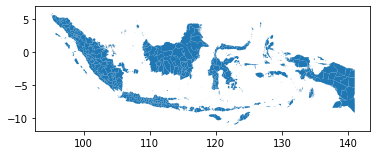

In [175]:
# Plot peta negara Indonesia
indo_prov.plot()

In [176]:
covid_prov_replace = covid_prov.rename(columns = {
    'aceh': 'Aceh',
    'bali': 'Bali',  
    'banten': 'Banten',
    'bengkulu': 'Bengkulu', 
    'gorontalo': 'Gorontalo',
    'di_yogyakarta': 'Yogyakarta', 
    'dki_jakarta': 'Jakarta Raya',
    'jambi': 'Jambi', 
    'jabar': 'Jawa Barat',
    'jateng': 'Jawa Tengah', 
    'jatim': 'Jawa Timur',
    'kalbar': 'Kalimantan Barat', 
    'kalsel': 'Kalimantan Selatan',
    'kalteng': 'Kalimantan Tengah',  
    'kaltim': 'Kalimantan Timur',
    'kaltara': 'Kalimantan Utara', 
    'kep_babel': 'Bangka-Belitung',
    'kep_riau': 'Riau', 
    'lampung': 'Lampung',
    'maluku': 'Maluku', 
    'malut': 'Maluku Utara',
    'ntb': 'Nusa Tenggara Barat', 
    'ntt': 'Nusa Tenggara Timur',
    'papua': 'Papua', 
    'riau': 'Riau',  
    'sulbar': 'Sulawesi Barat',
    'sulsel': 'Sulawesi Selatan', 
    'sulteng': 'Sulawesi Tengah',
    'sultra': 'Sulawesi Tenggara', 
    'sulut': 'Sulawesi Utara',
    'sumbar': 'Sumatera Barat', 
    'sumsel': 'Sumatera Selatan',
    'sumut': 'Sumatera Utara'
})

In [177]:
covid_prov_replace

,date,Aceh,Bali,Banten,Bengkulu,Gorontalo,Yogyakarta,Jakarta Raya,Jambi,Jawa Barat,Jawa Tengah,Jawa Timur,Kalimantan Barat,Kalimantan Selatan,Kalimantan Tengah,Kalimantan Timur,Kalimantan Utara,Bangka-Belitung,Riau,Lampung,Maluku,Maluku Utara,Nusa Tenggara Barat,Nusa Tenggara Timur,Papua,papbar,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara,unknown
0,19-Mar-20,0.0,1.0,39.0,0.0,0.0,4.0,186.0,0.0,40.0,12.0,9.0,2.0,0.0,2.0,3.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0
1,20-Mar-20,0.0,2.0,4.0,0.0,0.0,0.0,40.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21-Mar-20,0.0,0.0,4.0,0.0,0.0,1.0,44.0,0.0,14.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,22-Mar-20,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,4.0,1.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23-Mar-20,0.0,3.0,9.0,0.0,0.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,24-Mar-20,0.0,0.0,9.0,0.0,0.0,1.0,70.0,0.0,1.0,4.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0
6,25-Mar-20,0.0,3.0,2.0,0.0,0.0,10.0,38.0,0.0,13.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
7,26-Mar-20,1.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,5.0,2.0,8.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,14.0,1.0,0.0,0.0,3.0,0.0,0.0,20.0
8,27-Mar-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
covid_prov_replace.isnull()

,date,Aceh,Bali,Banten,Bengkulu,Gorontalo,Yogyakarta,Jakarta Raya,Jambi,Jawa Barat,Jawa Tengah,Jawa Timur,Kalimantan Barat,Kalimantan Selatan,Kalimantan Tengah,Kalimantan Timur,Kalimantan Utara,Bangka-Belitung,Riau,Lampung,Maluku,Maluku Utara,Nusa Tenggara Barat,Nusa Tenggara Timur,Papua,papbar,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara,unknown
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [179]:
# Drop data NaN
covid_prov_replace.dropna(inplace=True)
covid_prov_replace

,date,Aceh,Bali,Banten,Bengkulu,Gorontalo,Yogyakarta,Jakarta Raya,Jambi,Jawa Barat,Jawa Tengah,Jawa Timur,Kalimantan Barat,Kalimantan Selatan,Kalimantan Tengah,Kalimantan Timur,Kalimantan Utara,Bangka-Belitung,Riau,Lampung,Maluku,Maluku Utara,Nusa Tenggara Barat,Nusa Tenggara Timur,Papua,papbar,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara,unknown
0,19-Mar-20,0.0,1.0,39.0,0.0,0.0,4.0,186.0,0.0,40.0,12.0,9.0,2.0,0.0,2.0,3.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0
1,20-Mar-20,0.0,2.0,4.0,0.0,0.0,0.0,40.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21-Mar-20,0.0,0.0,4.0,0.0,0.0,1.0,44.0,0.0,14.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,22-Mar-20,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,4.0,1.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23-Mar-20,0.0,3.0,9.0,0.0,0.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,24-Mar-20,0.0,0.0,9.0,0.0,0.0,1.0,70.0,0.0,1.0,4.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0
6,25-Mar-20,0.0,3.0,2.0,0.0,0.0,10.0,38.0,0.0,13.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
7,26-Mar-20,1.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,5.0,2.0,8.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,14.0,1.0,0.0,0.0,3.0,0.0,0.0,20.0


In [180]:
for i in range(len(covid_prov_replace.sum().index)):
  q = indo_prov.groupby('Provinsi').sum().index
  p = covid_prov_replace.sum().index[i]
  j = p in q
  if not j:
    print('{} tidak terdapat pada kolom'.format(p))

date tidak terdapat pada kolom
papbar tidak terdapat pada kolom
unknown tidak terdapat pada kolom


In [181]:
covid_prov_replace.T.reset_index().head()

,index,0,1,2,3,4,5,6,7
0,date,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,24-Mar-20,25-Mar-20,26-Mar-20
1,Aceh,0,0,0,0,0,0,0,1
2,Bali,1,2,0,0,3,0,3,0
3,Banten,39,4,4,0,9,9,2,0
4,Bengkulu,0,0,0,0,0,0,0,0


In [182]:
# Merge dataset indo_prov dan covid_prov
df = indo_prov.merge(covid_prov_replace.T.reset_index(), left_on='Provinsi', right_on='index')
df.head()

,Provinsi,geometry,index,0,1,2,3,4,5,6,7
0,Aceh,"MULTIPOLYGON (((96.90573 3.60124, 96.90451 3.6...",Aceh,0,0,0,0,0,0,0,1
1,Aceh,"POLYGON ((96.57126 4.57926, 96.56599 4.57711, ...",Aceh,0,0,0,0,0,0,0,1
2,Aceh,"MULTIPOLYGON (((94.97379 5.78853, 94.97289 5.7...",Aceh,0,0,0,0,0,0,0,1
3,Aceh,"MULTIPOLYGON (((95.83961 4.40411, 95.83920 4.4...",Aceh,0,0,0,0,0,0,0,1
4,Aceh,"MULTIPOLYGON (((97.65528 2.60139, 97.65528 2.6...",Aceh,0,0,0,0,0,0,0,1


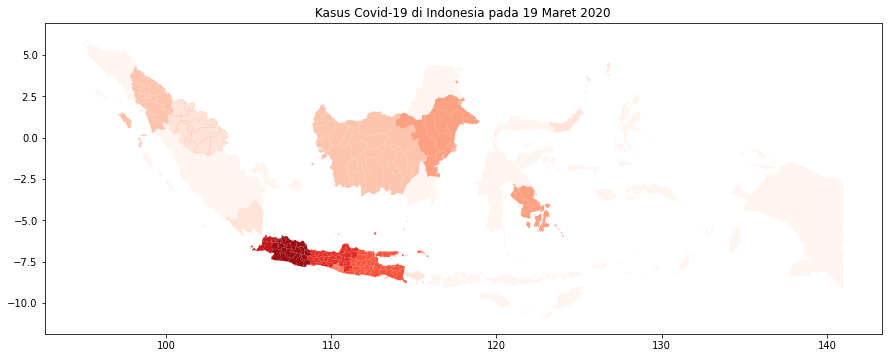

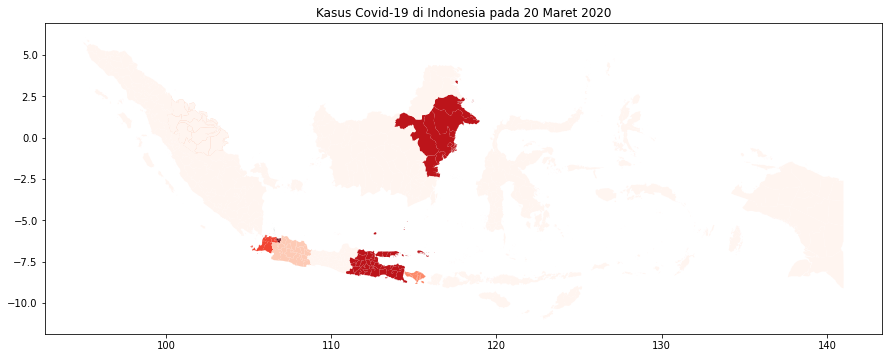

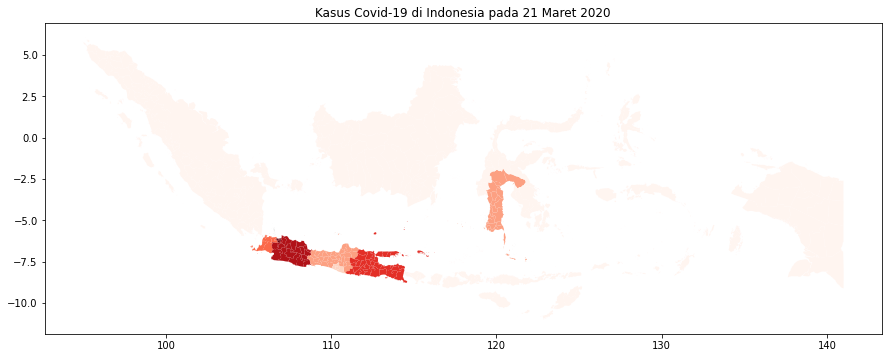

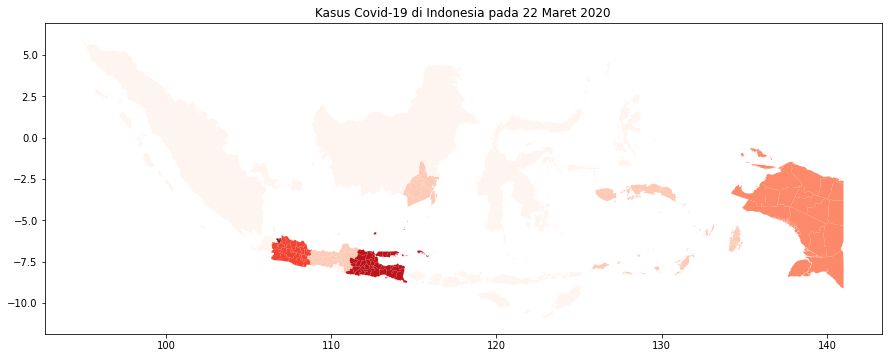

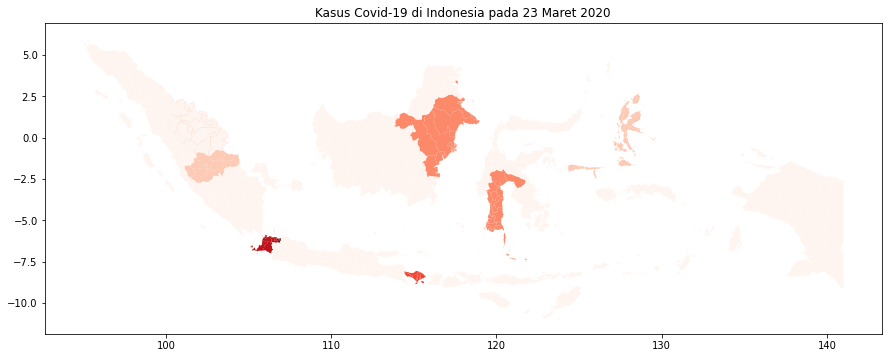

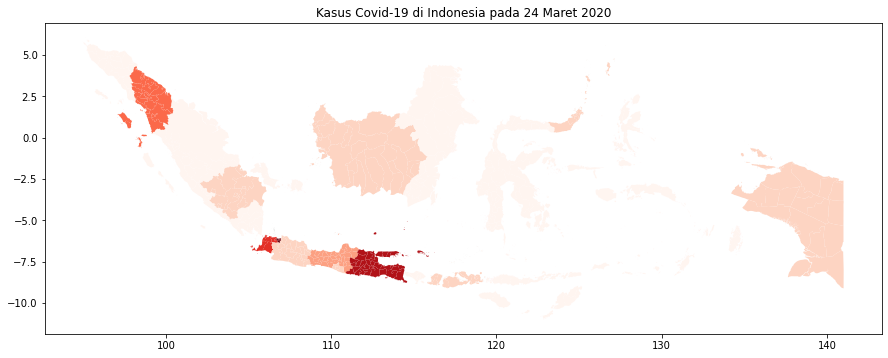

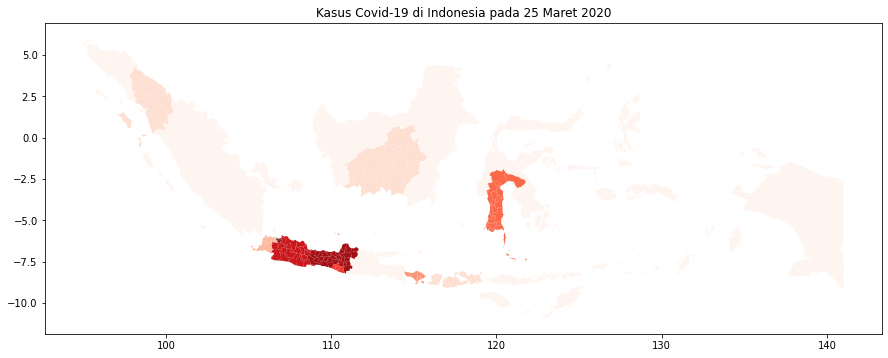

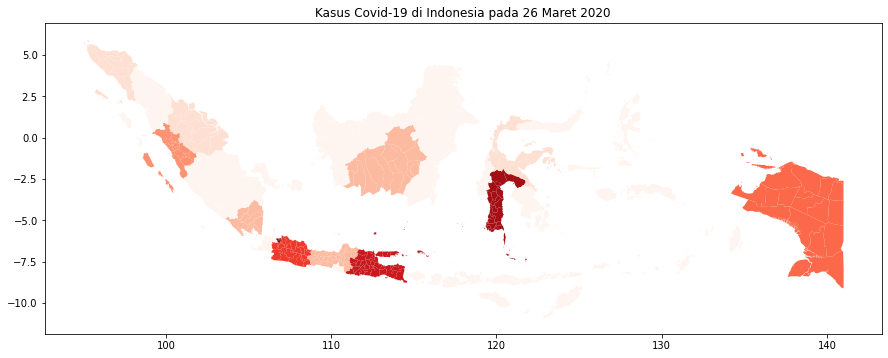

In [183]:
# Visualisasi untuk setiap tanggal
anim_path = pathlib.Path('anim/')
anim_path.mkdir(parents=True, exist_ok=True)

date = 18
image_files = []

for i in range(8):
  df.plot(
    figsize=(15, 15),
    column=df[i],
    cmap='Reds',
    alpha = 1
)

  date += 1
  plt.title(f'Kasus Covid-19 di Indonesia pada {date} Maret 2020')

  file_name = str(anim_path / '{}.png'.format(date))
  plt.savefig(file_name, bbox_inches='tight', pad_inches=0.1)
  image_files.append(file_name)

In [184]:
images = []

for file_name in image_files:
    images.append(imageio.imread(file_name))

gif_path = 'movie.gif'
imageio.mimsave(gif_path, images, fps=1)

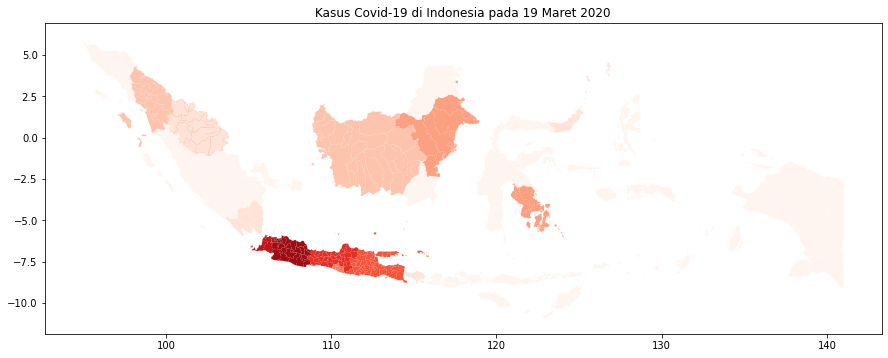

In [185]:
from IPython.display import Image

Image(open('movie.gif', 'rb').read())